In [82]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 150

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

from src.load_data import LoadData
from src.prep_data import PrepData
from src.predict_data import PredictData

In [183]:
# Set the name of the file to load, and bring in Loader and Data Prep
loader = LoadData()
prep = PrepData()

df = loader.load_traindata_to_df()

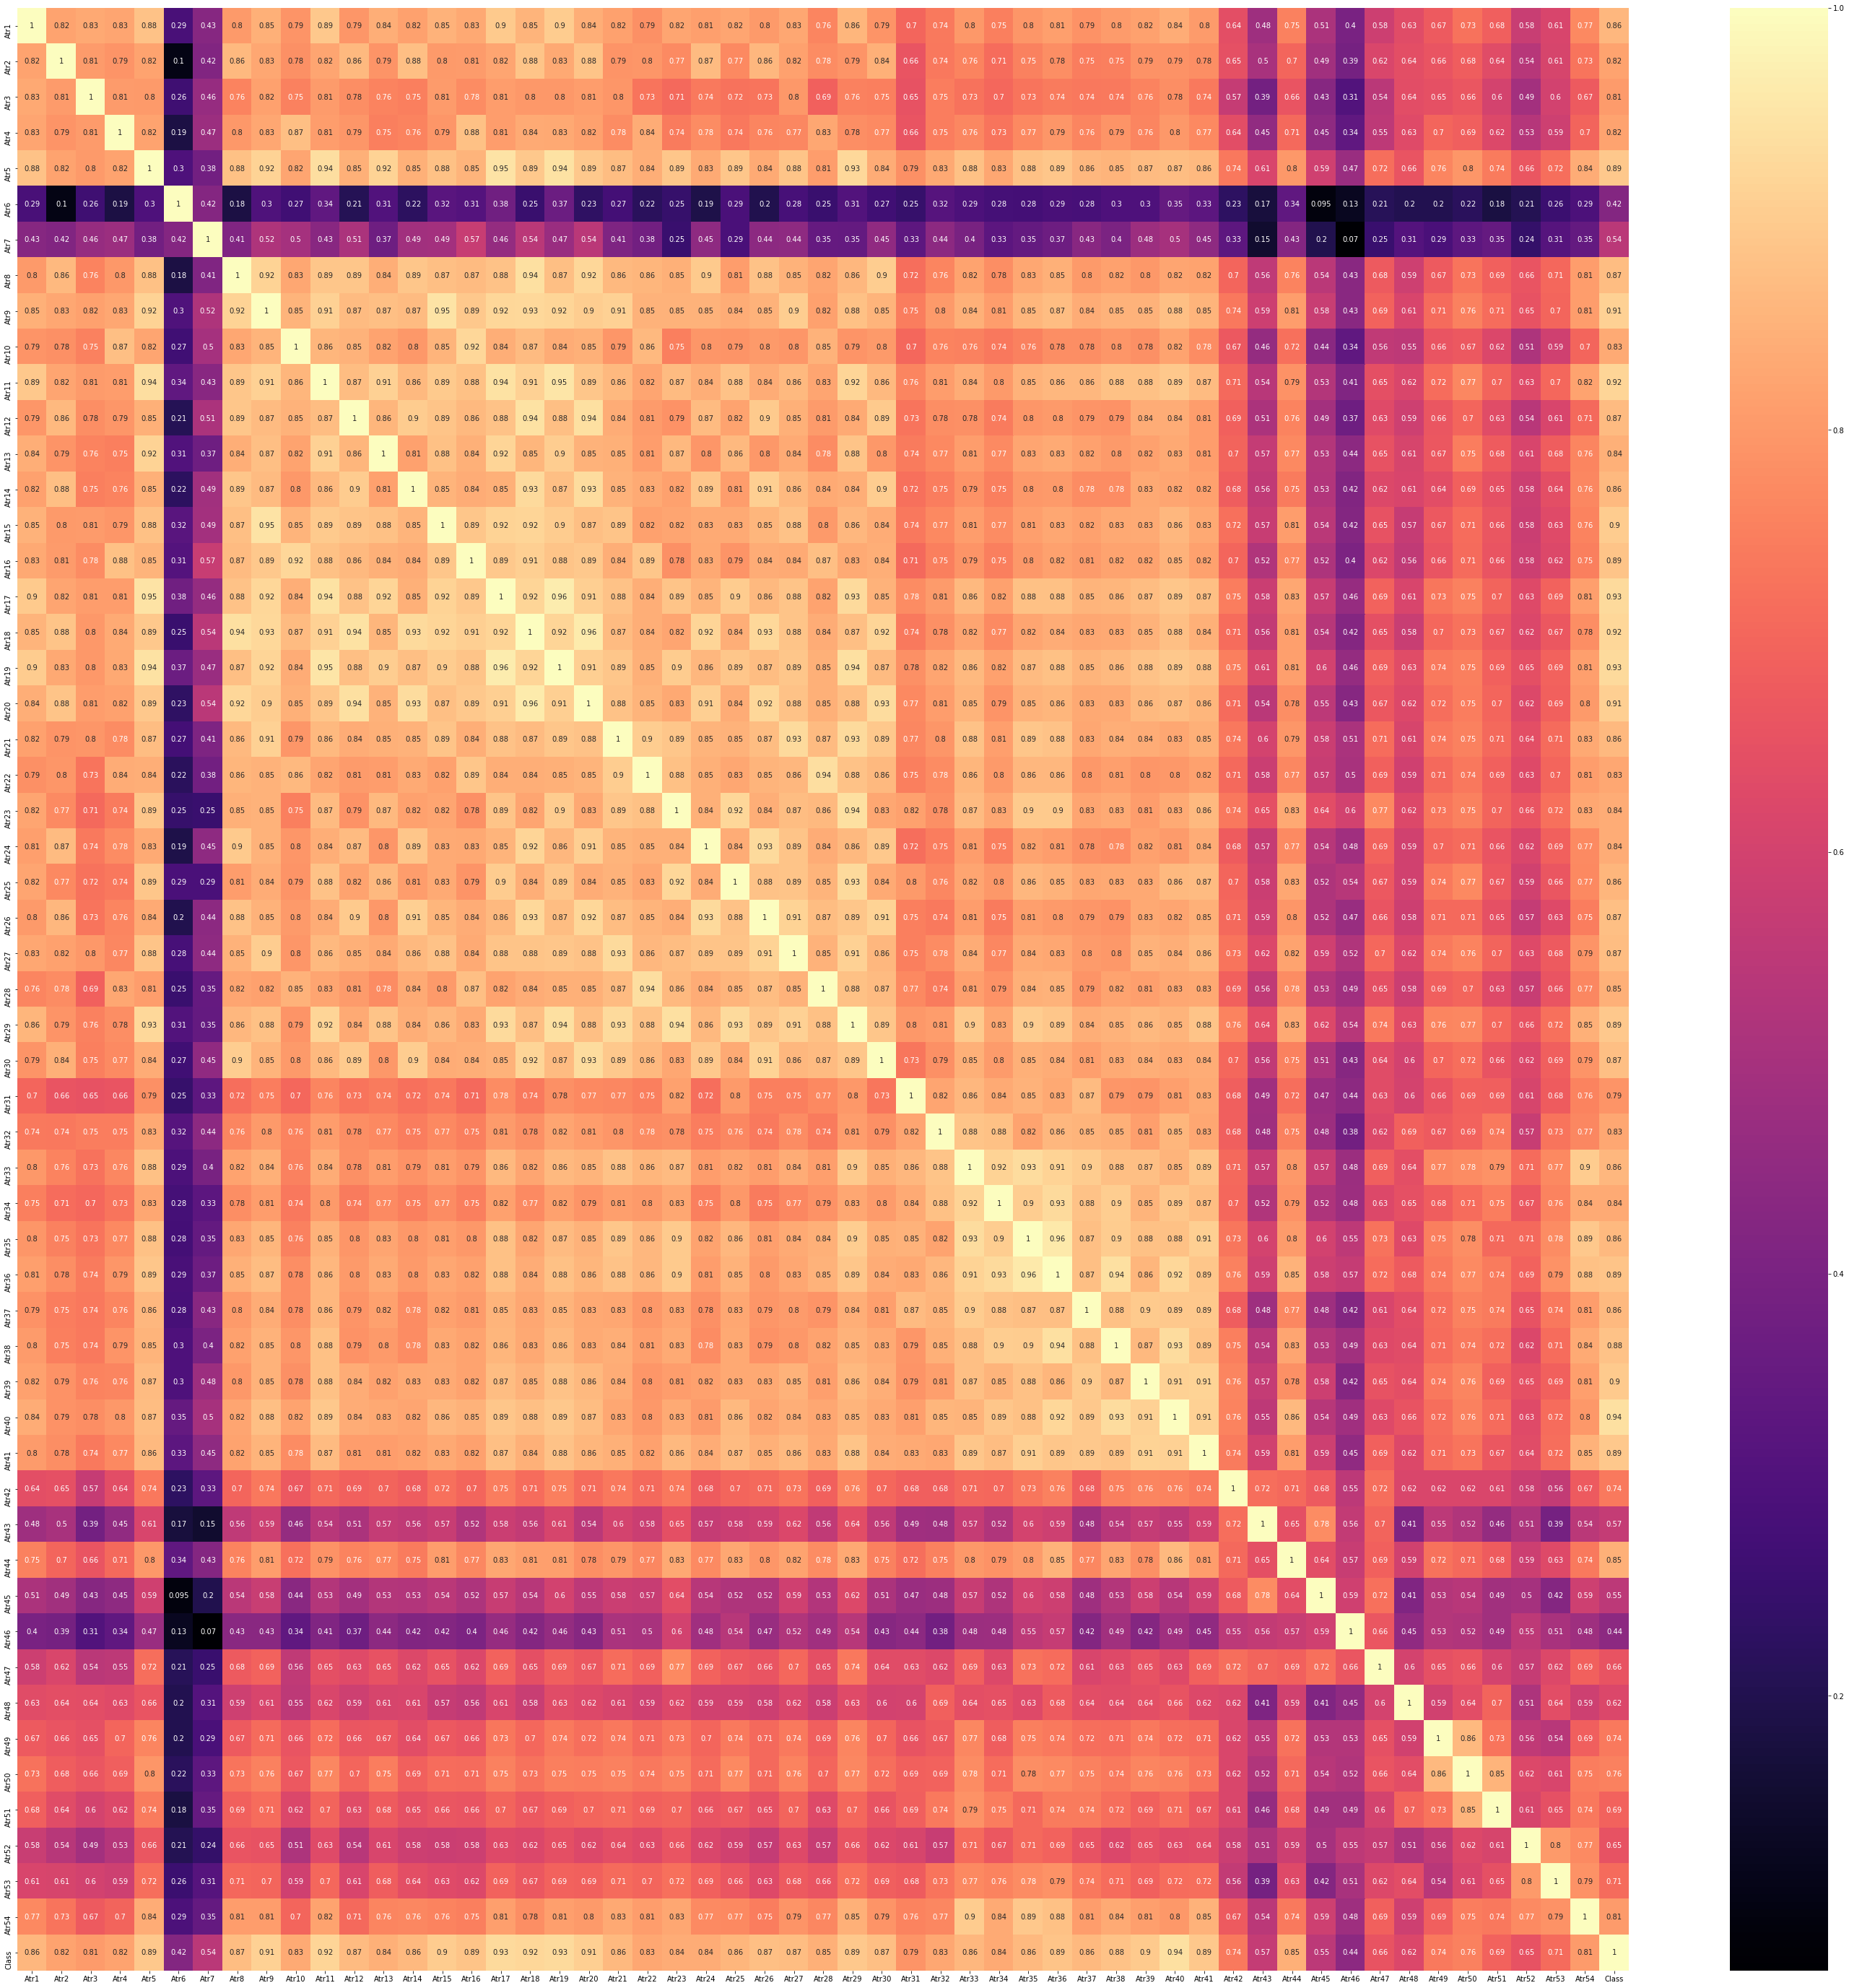

In [48]:
plt.figure(figsize=(50,50))
corr_measures = df.corr()
sns.heatmap(corr_measures, annot=True, cmap="magma")
plt.show()

In [67]:
df1_corr = corr_measures.loc['Class', :].sort_values(ascending=False)

In [85]:
df_sorted = corr_measures.loc['Class', :].sort_values(ascending=False)
cols = ['Corr']
df_corr = pd.DataFrame(df_sorted)
df_corr.columns = cols
df_corr.drop('Class')

df_merge = pd.merge(df_corr, loader.questions, left_index=True, right_on='ID')
df_merge.head(100)

,Corr,ID,Num,Question,flip_scale
39,0.938684,Atr40,40,We're just starting a discussion before I know what's going on,0
16,0.929346,Atr17,17,We share the same views about being happy in our life with my spouse,1
18,0.928627,Atr19,19,My spouse and I have similar ideas about how roles should be in marriage,1
17,0.923208,Atr18,18,My spouse and I have similar ideas about how marriage should be,1
10,0.918386,Atr11,11,"I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other",1
8,0.912368,Atr9,9,I enjoy traveling with my wife,1
19,0.907008,Atr20,20,My spouse and I have similar values in trust,1
14,0.901220,Atr15,15,Our dreams with my spouse are similar and harmonious,1
38,0.896180,Atr39,39,Our discussions often occur suddenly,0
40,0.894356,Atr41,41,"When I talk to my spouse about something, my calm suddenly breaks",0


In [132]:
coef_avg = 0
for i in calibrator.calibrated_classifiers_:

    coef_avg = coef_avg + i.base_estimator.coef_
coef_avg  = coef_avg/len(calibrator.calibrated_classifiers_)

In [133]:
coef_avg

array([[ 0.05196838,  0.06176982,  0.10126948,  0.05499686,  0.06456057,
         0.09176633,  0.        ,  0.02255713,  0.02255713, -0.05130609,
         0.01449192,  0.00774384, -0.04645553,  0.06151247,  0.09174757,
         0.04416634,  0.11579054,  0.07671569,  0.09853237,  0.0786853 ,
         0.02936617, -0.00030283, -0.01345597, -0.01892101,  0.04465858,
         0.14383574,  0.02329135,  0.10992763,  0.06392397,  0.06737912,
         0.08970084,  0.08433408,  0.06904551,  0.06898523,  0.03053118,
         0.06648189,  0.02403412,  0.06917025,  0.08100761,  0.16895447,
         0.06556302,  0.06037349,  0.05473864,  0.0920587 , -0.01452981,
         0.02498032,  0.02117523, -0.02172376,  0.16327492,  0.05219664,
        -0.00872709,  0.05134883,  0.09646627, -0.04115432]])

In [160]:
# Get Coefficients of Original Model
df_array = model.coef_.reshape(-1,1)
df_coef = pd.DataFrame.from_records(df_array)

# Get Coefficients of Calibrated Model
df_array_calibrated = coef_avg.reshape(-1,1)
df_coef_calibrated = pd.DataFrame.from_records(df_array_calibrated)

# Merge df_coef with Original Model and get Exponentials
df_coef_merged = pd.merge(df_coef, df_merge, left_index=True, right_index=True)
df_coef_merged['Exp'] = (np.exp(df_coef_merged[0]))
df_coef_merged.drop(df_coef_merged.columns[0], axis=1, inplace=True)

# Merge df_coef with Original Model and get Exponentials
df_coef_merged = pd.merge(df_coef_calibrated, df_coef_merged, left_index=True, right_index=True)
df_coef_merged['Exp_Calibrated'] = (np.exp(df_coef_merged[0]))
df_coef_merged.drop(df_coef_merged.columns[0], axis=1, inplace=True)

# Drop Unneeded columns
df_coef_merged.drop(columns=['Num', 'flip_scale'])

# Organize and Sort by Exponent of Calibrated Model
sorted_cols = ['ID', 'Question', 'Corr', 'Exp', 'Exp_Calibrated']
df_coef_merged[sorted_cols].sort_values(by=['Exp_Calibrated'], ascending=False)

,ID,Question,Corr,Exp,Exp_Calibrated
39,Atr40,We're just starting a discussion before I know what's going on,0.938684,1.195190,1.184066
48,Atr49,I have nothing to do with what I've been accused of,0.740704,1.201852,1.177360
25,Atr26,I know my spouse's basic anxieties,0.872868,1.164161,1.154694
16,Atr17,We share the same views about being happy in our life with my spouse,0.929346,1.135060,1.122761
27,Atr28,I know my spouse's hopes and wishes,0.846606,1.121658,1.116197
2,Atr3,"When we need it, we can take our discussions with my spouse from the beginning and correct it",0.806709,1.117791,1.106575
18,Atr19,My spouse and I have similar ideas about how roles should be in marriage,0.928627,1.112576,1.103550
52,Atr53,"When I discuss, I remind my spouse of her/his inadequacy",0.711176,1.110384,1.101272
43,Atr44,Sometimes I think it's good for me to leave home for a while,0.847336,1.101796,1.096429
5,Atr6,We don't have time at home as partners,0.420913,1.104567,1.096109


In [185]:
loader.answers

,id,answer
0,0,Strongly Disagree
1,1,Disagree
2,2,Neither Agree or Disagree
3,3,Agree
4,4,Strongly Agree


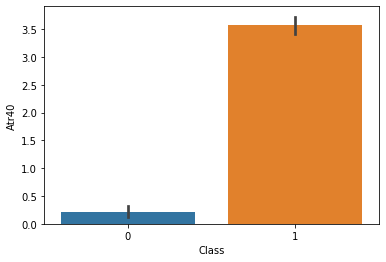

In [155]:
sns.barplot(data=df, y='Atr40', x='Class')

In [103]:
df

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,3,4,0,0,4,0,1,0,1,0,0,0,0,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,1,3,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,2,1,3,3,0,2,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,4,1,2,1,1,0,4,3,3,2,2,3,2,4,3,1,0


In [125]:
# The target for this particular dataset is class
y = df['Class']
X = prep.drop_target_column(df)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 680
)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

calibrator = CalibratedClassifierCV(model, cv=10)
calibrator.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=SVC(C=1.0, break_ties=False,
                                          cache_size=200, class_weight=None,
                                          coef0=0.0,
                                          decision_function_shape='ovr',
                                          degree=3, gamma='scale',
                                          kernel='linear', max_iter=-1,
                                          probability=False, random_state=None,
                                          shrinking=True, tol=0.001,
                                          verbose=False),
                       cv=10, method='sigmoid')

In [11]:
X.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
0,2,2,4,1,0,0,0,0,0,0,...,3,2,1,3,3,3,2,3,2,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,2,3,4,4,4,4,2,2
2,2,2,2,2,1,3,2,1,1,2,...,2,3,2,3,1,1,1,2,2,2
3,3,2,3,2,3,3,3,3,3,3,...,3,2,2,3,3,3,3,2,2,2
4,2,2,1,1,1,1,0,0,0,0,...,2,2,1,2,3,2,2,2,1,0


In [16]:
model_final = loader.load_model('./models/cal_model.pkl')
predictor = PredictData(model_final)

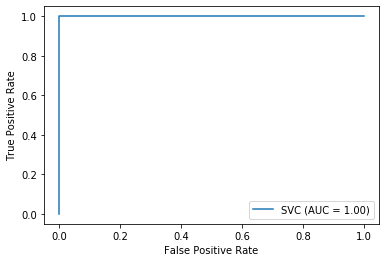

In [38]:
svc_disp = plot_roc_curve(model, X_test, y_test)
plt.show()

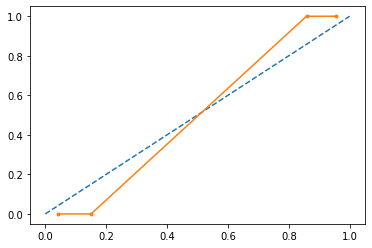

In [20]:
# predict probabilities
probs = calibrator.predict_proba(X_test)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(y_test, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
plt.plot(mpv, fop, marker='.')
plt.show()

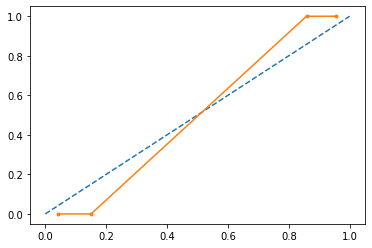

In [21]:
# predict probabilities
model.decision_function(X_test)
# reliability diagram
fop, mpv = calibration_curve(y_test, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
plt.plot(mpv, fop, marker='.')
plt.show()

In [39]:
predictions = model.predict(X_test)

In [40]:
accuracy_score(y_test, predictions)

1.0

In [41]:
precision_score(y_test, predictions)

1.0

In [42]:
recall_score(y_test, predictions)

1.0

In [43]:
f1_score(y_test, predictions)

1.0

In [179]:
data = np.random.randint(5, size=(10,54))
data

array([[0, 4, 1, 0, 2, 3, 2, 3, 4, 0, 2, 3, 3, 1, 1, 0, 1, 2, 3, 2, 3, 1,
        2, 4, 0, 3, 2, 4, 4, 2, 0, 2, 4, 2, 4, 2, 4, 3, 2, 4, 2, 1, 2, 4,
        1, 4, 2, 0, 3, 4, 3, 4, 2, 4],
       [1, 4, 1, 0, 1, 1, 4, 0, 0, 1, 2, 0, 0, 0, 2, 4, 2, 1, 2, 1, 1, 3,
        0, 2, 1, 3, 1, 0, 3, 2, 2, 3, 0, 0, 3, 1, 0, 4, 1, 2, 3, 3, 0, 2,
        4, 0, 4, 4, 0, 3, 3, 1, 2, 4],
       [2, 4, 2, 1, 1, 3, 2, 1, 1, 2, 2, 1, 2, 1, 4, 0, 0, 2, 3, 2, 0, 1,
        2, 3, 4, 0, 4, 2, 4, 4, 4, 2, 4, 3, 3, 4, 3, 1, 0, 2, 4, 0, 3, 2,
        4, 2, 0, 0, 0, 1, 4, 3, 0, 0],
       [3, 3, 1, 2, 0, 4, 0, 2, 3, 2, 1, 1, 0, 1, 1, 0, 2, 1, 3, 3, 2, 2,
        0, 2, 1, 4, 4, 0, 2, 1, 4, 4, 4, 0, 1, 3, 2, 1, 3, 2, 0, 4, 0, 0,
        2, 3, 0, 3, 4, 4, 4, 0, 1, 0],
       [2, 2, 2, 0, 1, 2, 3, 0, 2, 4, 0, 4, 1, 1, 3, 2, 3, 4, 0, 1, 2, 0,
        1, 0, 3, 1, 2, 3, 0, 2, 0, 4, 0, 0, 0, 0, 0, 4, 2, 0, 1, 2, 1, 4,
        2, 0, 1, 0, 0, 2, 2, 4, 3, 0],
       [1, 4, 4, 3, 2, 3, 3, 4, 0, 1, 2, 2, 2, 2, 2, 1, 1, 3, 3, 

In [180]:
calibrator.predict_proba(data)

array([[0.2668875 , 0.7331125 ],
       [0.55819827, 0.44180173],
       [0.41149735, 0.58850265],
       [0.35190234, 0.64809766],
       [0.53753055, 0.46246945],
       [0.39850089, 0.60149911],
       [0.3862985 , 0.6137015 ],
       [0.27988227, 0.72011773],
       [0.28873667, 0.71126333],
       [0.37705386, 0.62294614]])

In [2]:
from src.prep_data import PrepData
from src.predict_data import PredictData
from src.load_data import LoadData

In [169]:
loader = LoadData()
prep = PrepData()
model = loader.load_model('./models/cal_model.pkl')
predictor = PredictData(model)

In [181]:
prediction = predictor.predict(data)

In [182]:
prediction

array([[0.20636771, 0.79363229],
       [0.33981457, 0.66018543],
       [0.28223485, 0.71776515],
       [0.27409329, 0.72590671],
       [0.31453878, 0.68546122],
       [0.2428344 , 0.7571656 ],
       [0.25188321, 0.74811679],
       [0.19603351, 0.80396649],
       [0.25716805, 0.74283195],
       [0.29151023, 0.70848977]])

In [4]:
json = {k: np.random.randint(5) for k in range(54)}

In [5]:
data

{0: 2,
 1: 1,
 2: 4,
 3: 3,
 4: 1,
 5: 4,
 6: 3,
 7: 0,
 8: 3,
 9: 1,
 10: 0,
 11: 0,
 12: 2,
 13: 3,
 14: 2,
 15: 0,
 16: 0,
 17: 3,
 18: 2,
 19: 1,
 20: 1,
 21: 1,
 22: 3,
 23: 2,
 24: 2,
 25: 0,
 26: 1,
 27: 1,
 28: 4,
 29: 3,
 30: 4,
 31: 2,
 32: 3,
 33: 0,
 34: 0,
 35: 4,
 36: 2,
 37: 1,
 38: 1,
 39: 3,
 40: 0,
 41: 3,
 42: 3,
 43: 0,
 44: 2,
 45: 2,
 46: 1,
 47: 2,
 48: 2,
 49: 0,
 50: 4,
 51: 0,
 52: 3,
 53: 3}

In [3]:
df = loader.userdata_to_df(data)

NameError: name 'data' is not defined

In [59]:
data

{0: 2,
 1: 1,
 2: 2,
 3: 1,
 4: 1,
 5: 0,
 6: 1,
 7: 4,
 8: 4,
 9: 0,
 10: 1,
 11: 2,
 12: 4,
 13: 1,
 14: 3,
 15: 3,
 16: 2,
 17: 4,
 18: 1,
 19: 2,
 20: 3,
 21: 0,
 22: 4,
 23: 3,
 24: 1,
 25: 3,
 26: 0,
 27: 4,
 28: 3,
 29: 2,
 30: 2,
 31: 1,
 32: 0,
 33: 2,
 34: 0,
 35: 1,
 36: 2,
 37: 2,
 38: 3,
 39: 3,
 40: 2,
 41: 0,
 42: 4,
 43: 0,
 44: 2,
 45: 3,
 46: 3,
 47: 1,
 48: 3,
 49: 0,
 50: 2,
 51: 0,
 52: 2,
 53: 1}

In [33]:
prediction = predictor.predict(df)

In [34]:
prediction[0][1]

0.7016107151632656

In [10]:
import json
import requests
import numpy as np

data = {k: np.random.randint(5) for k in range(54)}

r = requests.post('http://35.237.214.19', json=data)

In [27]:
#r = requests.post('http://34.74.117.195', json=[1])
divorce_results = r.json()['divorce']

In [29]:
print(f'Your likelihood of divorce is {divorce_results * 100:.2f}%.')

Your likelihood of divorce is 73.32%.


In [25]:
r.json()['divorce']

0.733182060243989

RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request.  Consult the documentation on testing for
information about how to avoid this problem.

In [30]:
from flask import Flask, jsonify, request

In [37]:
prediction[0]

array([0.29838928, 0.70161072])

In [75]:
json = {k: np.random.randint(2) for k in range(54)}
df = loader.userdata_to_df(json)
prediction = predictor.predict(df)
prediction[0][1]

0.1528486716304013

In [106]:
prediction[0]

array([0.84715133, 0.15284867])

In [4]:
df = loader.load_headerdata_to_df()

In [5]:
df

,Num,Question,Strongly Disagree,Disagree,Neither Agree or Disagree,Agree,Strongly Agree
0,1,If one of us apologizes when our discussion d...,4,3,2,1,0
1,2,"I know we can ignore our differences, even if...",4,3,2,1,0
2,3,"When we need it, we can take our discussions ...",4,3,2,1,0
3,4,"When I discuss with my spouse, to contact him...",4,3,2,1,0
4,5,The time I spent with my wife is special for us,4,3,2,1,0
5,6,We don't have time at home as partners,0,1,2,3,4
6,7,We are like two strangers who share the same ...,0,1,2,3,4
7,8,I enjoy our holidays with my wife,4,3,2,1,0
8,9,I enjoy traveling with my wife,4,3,2,1,0
9,10,Most of our goals are common to my spouse,4,3,2,1,0


In [6]:
from sklearn.utils import shuffle

In [115]:
df = shuffle(df)

In [139]:
df

,Num,Question,Strongly Disagree,Disagree,Neither Agree or Disagree,Agree,Strongly Agree
42,43,I mostly stay silent to calm the environment ...,4,3,2,1,0
39,40,We're just starting a discussion before I kno...,0,1,2,3,4
52,53,"When I discuss, I remind my spouse of her/his...",0,1,2,3,4
38,39,Our discussions often occur suddenly,0,1,2,3,4
26,27,I know what my spouse's current sources of st...,4,3,2,1,0
11,12,My spouse and I have similar values in terms ...,4,3,2,1,0
20,21,I know exactly what my wife likes,4,3,2,1,0
34,35,I can insult my spouse during our discussions,0,1,2,3,4
35,36,I can be humiliating when we discussions,0,1,2,3,4
43,44,Sometimes I think it's good for me to leave h...,0,1,2,3,4


In [126]:
for index, row in df.iterrows():
    print(row['Num'])

43
40
53
39
27
12
21
35
36
44
17
42
9
8
25
15
22
33
11
32
38
41
18
31
50
7
48
34
6
10
19
30
46
52
37
49
1
20
28
5
14
4
16
51
47
29
45
23
3
26
13
54
2
24


In [130]:
survey_choices = list(df.drop(['Num', 'Question'], axis=1).columns)

In [135]:
for position, item in enumerate(survey_choices):
    print(position, "-", item)

0 - Strongly Disagree
1 - Disagree
2 - Neither Agree or Disagree
3 - Agree
4 - Strongly Agree


In [7]:
import sys
import json
import requests

def take_survey(df):
    survey_answers = {}
    df = shuffle(df)
    survey_choices = list(df.drop(['Num', 'Question'], axis=1).columns)

    for index, row in df.iterrows():
        for position, item in enumerate(survey_choices):
            print(position, "-", item)
            q = row['Question'] + ": "
        x = input(q)
        
        while True:
                try:
                    n = int(x)
                except ValueError:
                    print('Value must be an integer between 0 and 4')
                    x = input(q)
                else:
                        if 0 <= int(n) <= 4:
                            survey_answers[index] = n
                            break
                        else:
                            print('Value must be an integer between 0 and 4')
                            x = input(q)
        #return x

    r = requests.post('http://35.237.214.19', json=survey_answers)

    return r.text

In [8]:
take_survey(df)

0 - Strongly Disagree
1 - Disagree
2 - Neither Agree or Disagree
3 - Agree
4 - Strongly Agree
 When I argue with my spouse, ı only go out and I don't say a word: a
Value must be an integer between 0 and 4
 When I argue with my spouse, ı only go out and I don't say a word: 5
Value must be an integer between 0 and 4
 When I argue with my spouse, ı only go out and I don't say a word: 10
Value must be an integer between 0 and 4
 When I argue with my spouse, ı only go out and I don't say a word: 4
0 - Strongly Disagree
1 - Disagree
2 - Neither Agree or Disagree
3 - Agree
4 - Strongly Agree
 I mostly stay silent to calm the environment a little bit: 0
0 - Strongly Disagree
1 - Disagree
2 - Neither Agree or Disagree
3 - Agree
4 - Strongly Agree
 When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger: 1
0 - Strongly Disagree
1 - Disagree
2 - Neither Agree or Disagree
3 - Agree
4 - Strongly Agree
 Our dreams with my spouse are similar and harmonio

 The time I spent with my wife is special for us: 1
0 - Strongly Disagree
1 - Disagree
2 - Neither Agree or Disagree
3 - Agree
4 - Strongly Agree
 I can use negative statements about my spouse's personality during our discussions: 2
0 - Strongly Disagree
1 - Disagree
2 - Neither Agree or Disagree
3 - Agree
4 - Strongly Agree
 I know my spouse's hopes and wishes: 0
0 - Strongly Disagree
1 - Disagree
2 - Neither Agree or Disagree
3 - Agree
4 - Strongly Agree
 I know exactly what my wife likes: 0


'{"divorce":0.3371053316905761}\n'

In [2]:
loader = LoadData()

In [3]:
questions = loader.questions

In [6]:
questions.loc[5, 'flip_scale']

0

In [15]:
from src.survey import Survey
from src.load_data import LoadData

loader = LoadData()
survey = Survey(loader)

In [16]:
import numpy as np
data = {k: np.random.randint(5) for k in range(54)}

In [17]:
data

{0: 3,
 1: 4,
 2: 0,
 3: 2,
 4: 0,
 5: 1,
 6: 3,
 7: 1,
 8: 3,
 9: 4,
 10: 2,
 11: 2,
 12: 2,
 13: 1,
 14: 0,
 15: 1,
 16: 0,
 17: 3,
 18: 4,
 19: 2,
 20: 4,
 21: 0,
 22: 0,
 23: 3,
 24: 0,
 25: 4,
 26: 3,
 27: 2,
 28: 4,
 29: 3,
 30: 3,
 31: 3,
 32: 1,
 33: 0,
 34: 3,
 35: 3,
 36: 1,
 37: 2,
 38: 1,
 39: 4,
 40: 1,
 41: 0,
 42: 2,
 43: 2,
 44: 4,
 45: 3,
 46: 4,
 47: 2,
 48: 1,
 49: 2,
 50: 1,
 51: 4,
 52: 1,
 53: 3}

In [18]:
data_flip = survey.transform_results(data)

In [19]:
data_flip

{0: 1,
 1: 0,
 2: 4,
 3: 2,
 4: 4,
 5: 1,
 6: 3,
 7: 3,
 8: 1,
 9: 0,
 10: 2,
 11: 2,
 12: 2,
 13: 3,
 14: 4,
 15: 3,
 16: 4,
 17: 1,
 18: 0,
 19: 2,
 20: 0,
 21: 4,
 22: 4,
 23: 1,
 24: 4,
 25: 0,
 26: 1,
 27: 2,
 28: 0,
 29: 1,
 30: 3,
 31: 3,
 32: 1,
 33: 0,
 34: 3,
 35: 3,
 36: 1,
 37: 2,
 38: 1,
 39: 4,
 40: 1,
 41: 0,
 42: 2,
 43: 2,
 44: 4,
 45: 3,
 46: 4,
 47: 2,
 48: 1,
 49: 2,
 50: 1,
 51: 4,
 52: 1,
 53: 3}

In [7]:
answers = loader.answers

In [8]:
answers

,id,answer
0,0,Strongly Disagree
1,1,Disagree
2,2,Neither Agree or Disagree
3,3,Agree
4,4,Strongly Agree


In [12]:
for i, r in answers.iterrows():
    print(i, "-", r['answer'])

0 - Strongly Disagree
1 - Disagree
2 - Neither Agree or Disagree
3 - Agree
4 - Strongly Agree


In [21]:
import json
import requests

r = requests.post('http://35.237.214.19', json=survey.transform_results(data))
divorce_results = r.json()['divorce']
f'Your likelihood of divorce is {divorce_results * 100:.2f}%.'

In [24]:
r = requests.post('http://35.237.214.19', json=survey.transform_results(data))
divorce_results = r.json()['divorce']
f'Your likelihood of divorce is {divorce_results * 100:.2f}%.'

'Your likelihood of divorce is 73.57%.'

In [23]:
f'Your likelihood of divorce is {divorce_results * 100:.2f}%.'

'Your likelihood of divorce is 73.57%.'

In [26]:
from src.survey import Survey
from src.load_data import LoadData

loader = LoadData()
survey = Survey(loader)

survey.take_survey()

0 - Strongly Disagree
1 - Disagree
2 - Neither Agree or Disagree
3 - Agree
4 - Strongly Agree
 My discussion with my spouse is not calm: 0
0 - Strongly Disagree
1 - Disagree
2 - Neither Agree or Disagree
3 - Agree
4 - Strongly Agree
 When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ : 0
0 - Strongly Disagree
1 - Disagree
2 - Neither Agree or Disagree
3 - Agree
4 - Strongly Agree
 My spouse and I have similar ideas about how marriage should be: 0
0 - Strongly Disagree
1 - Disagree
2 - Neither Agree or Disagree
3 - Agree
4 - Strongly Agree
 When we need it, we can take our discussions with my spouse from the beginning and correct it: 0
0 - Strongly Disagree
1 - Disagree
2 - Neither Agree or Disagree
3 - Agree
4 - Strongly Agree
 When I discuss, I remind my spouse of her/his inadequacy: 1
0 - Strongly Disagree
1 - Disagree
2 - Neither Agree or Disagree
3 - Agree
4 - Strongly Agree
 I have nothing to do with what I've been accused of: 1
0 - Stron

 I can insult my spouse during our discussions: 1
0 - Strongly Disagree
1 - Disagree
2 - Neither Agree or Disagree
3 - Agree
4 - Strongly Agree
 I know my spouse's favorite food: 1


'Your likelihood of divorce is 76.35%.'